# Seaborn

Seaborn is a high-level plotting library that uses matplotlib as its lower level.  It's popular among data scientists for providing nicer-looking plots, and it works with pandas dataframes by default.  A broader gallery of examples is available at https://seaborn.pydata.org/examples/index.html, and the seaborn example code here is modified from there.

In [39]:
import seaborn as sns
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Faceted histograms

Sometimes the story's not best told with one histogram, but one for each group.

The thing to note here is how concise the code is - a single displot ("dis" = "distribution") command can break down the data by species and sex, and make a histogram plot for each combination.

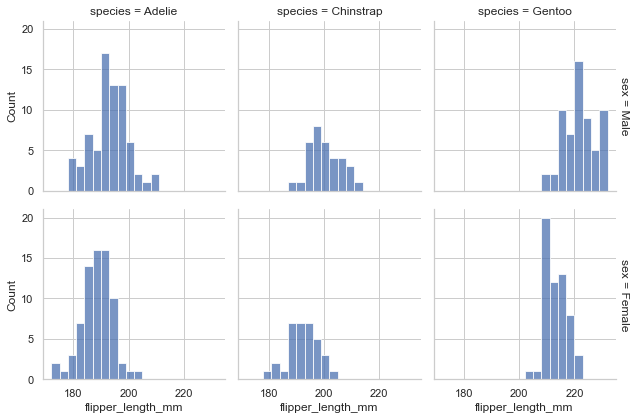

In [40]:
# From https://seaborn.pydata.org/examples/faceted_histogram.html

sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

Seaborn has five themes that can be chosen as arguments to set_theme(), with the possibility of more fine-tuning by passing additional arguments.  The default is "darkgrid," and others are "white," "dark," and "ticks."  Elements that are affected, or controllable by set_theme(), include color palette, font, and axis style. "Grid" or not and "white" or "dark" mostly control the darkness of the gridlines and of the background.



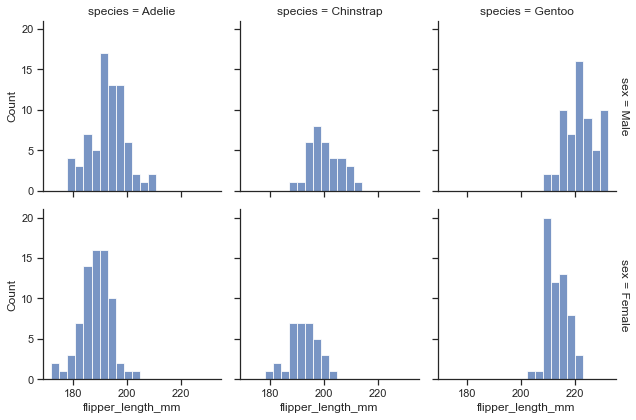

In [34]:
sns.set_theme(style="ticks")
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

A very slight change to this code, adding kind="kde" and removing binwith, plots smoothed versions of the data instead (kde stands for "kernel density estimate," a kind of probabilistically inspired smoothing).

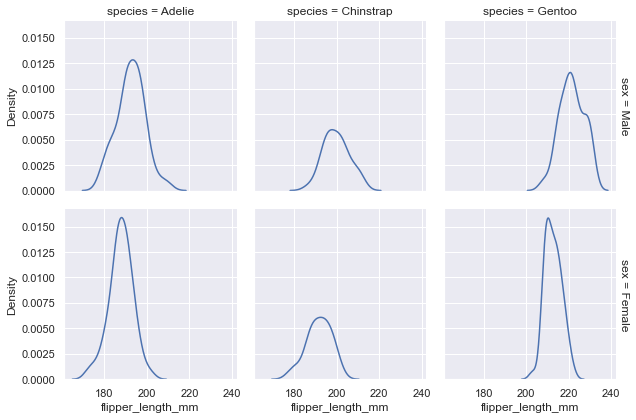

In [35]:
# From https://seaborn.pydata.org/examples/faceted_histogram.html

sns.set_theme(style="darkgrid")
sns.displot(
    df, kind="kde", x="flipper_length_mm", col="species", row="sex",
    height=3, facet_kws=dict(margin_titles=True),
)

## Bar charts with confidence intervals

The error bars are 95% confidence intervals by default, achieved by "bootstrapping" or resampling the existing data repeatedly.  A "ci=None" argument to catplot() would disable them.  ("cat" = "categorical")

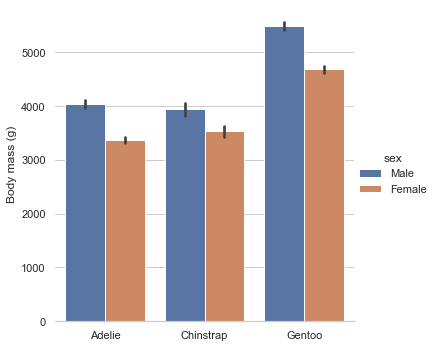

In [36]:
# https://seaborn.pydata.org/examples/grouped_barplot.html

sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="species", y="body_mass_g", hue="sex"
)
g.despine(left=True) # Removes left axis line
g.set_axis_labels("", "Body mass (g)")

## Plotting a joint distribution

Another neat plot that Seaborn can do is that of a joint distribution of X and Y, where the marginalized distributions of X and Y alone can be seen at the borders of the plot.  With a further argument of hue, this can be done for several different distributions.

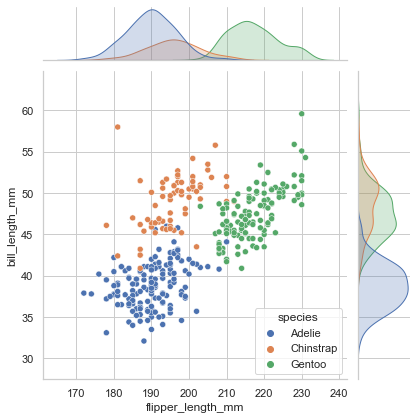

In [37]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

# 4-dimensional scatterplot

This example shows how you can plot more than 2 dimensions in a scatterplot, using color and size to designate the other dimensions.  The features can be numerical or categorical.


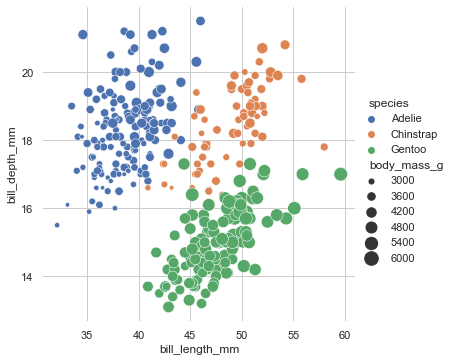

In [38]:
sns.set_theme(style="whitegrid")

g = sns.relplot(
    data=df,
    x="bill_length_mm", y="bill_depth_mm",
    hue="species", size="body_mass_g", sizes=(10, 200),
)
g.despine(left=True, bottom=True)

This also gives us a chance to show how we can choose a color palette.  A variety of named palettes are described at https://seaborn.pydata.org/tutorial/color_palettes.html.  You basically need to create a color map using sns.color_palette() to choose a named palette with additional argument as_cmap=True, then pass the colormap in as the palette argument to the plotter.

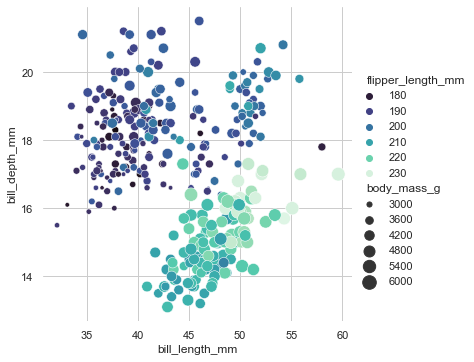

In [49]:
cmap = sns.color_palette('mako', as_cmap=True)
g = sns.relplot(
    data=df,
    x="bill_length_mm", y="bill_depth_mm",
    hue="flipper_length_mm", size="body_mass_g", sizes=(10, 200),
    palette = cmap
)
g.despine(left=True, bottom=True)